In [5]:
#load the needed packages and modules 
import pandas as pd
import numpy as np
from datetime import date
import datetime as dt

In [6]:
train_data_path = "/content/drive/MyDrive/Books recommendations system /train_transactions_extended.csv"
users_data_path = "/content/drive/MyDrive/Books recommendations system /users.csv"
items_data_path = "/content/drive/MyDrive/Books recommendations system /items.csv"
#load the data and make sure to change the path for your local directory 
train_data = pd.read_csv(train_data_path, delimiter=";")
users_data = pd.read_csv(users_data_path, delimiter=";")
items_data = pd.read_csv(items_data_path, delimiter=";")

In [ ]:
len(train_data)

259566

In [ ]:
#first 5 rows
nl = '\n'
print (f"train data sample {nl}{train_data.head()}")
print (f"users data sample {nl}{users_data.head()}")
print (f"items data sample {nl}{items_data.head()}")

train data sample 
            chb        sys_numb      date_1 is_real         type  \
0  100000641403  RSL01004206702  2021-02-21     yes   скачивание   
1  100000641403  RSL01000769304  2021-03-23     yes   скачивание   
2  100000641403  RSL01004211574  2021-02-21     yes   скачивание   
3  100000644359  RSL01009800093  2021-03-16     yes  книговыдача   
4  100000644359  RSL01003557352  2021-03-10     yes  книговыдача   

                source  is_printed  
0          dlib.rsl.ru       False  
1          dlib.rsl.ru       False  
2          dlib.rsl.ru       False  
3  единый просмоторщик       False  
4  единый просмоторщик       False  
users data sample 
            chb age  gender   chit_type
0  300001020830  21  female  нет данных
1  300001113642  36  female  нет данных
2  300001148466  46  female  нет данных
3  300001117011  22  female  нет данных
4  200001038094  24  female        echb
items data sample 
         sys_numb                                              title  \


In [ ]:
#строго фиксируем кол-во пользователей и уникальных документов
n_users = len(train_data['chb'].unique())
n_items = len(items_data['sys_numb'].unique())

In [ ]:
n_users

16753

In [ ]:
n_items

354355

In [ ]:
#т.к далее придётся работать с матрицами созданим словари, которые точно отображают индексы в chb/sys_numb и обратно
mapping_chb_index = {chb_number: index for index, chb_number in enumerate(train_data['chb'].unique())}
mapping_sys_numb_index = {sys_number: index for index, sys_number in enumerate(items_data['sys_numb'].unique())}

mapping_index_chb = {index: chb_number for index, chb_number in enumerate(train_data['chb'].unique())}
mapping_index_sys_numb = {index: sys_number for index, sys_number in enumerate(items_data['sys_numb'].unique())}

In [ ]:
mapping_chb_index

In [ ]:
mapping_sys_numb_index

In [ ]:
len(mapping_index_chb)

16753

In [ ]:
len(mapping_index_sys_numb)

354355

Агрегирование читательский билет-id документа

In [ ]:
maped_df = pd.DataFrame()
agg_func_unique= {'sys_numb': ['unique']}
maped_df["maped_id"] = train_data.groupby(["chb"]).agg(agg_func_unique)
maped_df.head(10)

In [ ]:
agg_func_unique= {'sys_numb': ['unique']}

In [ ]:
maped_df["maped_id"] = train_data.groupby(["chb"]).agg(agg_func_unique)

In [ ]:
maped_df.head(10)

maped_id
chb                                                            
100000641403   [RSL01004206702, RSL01000769304, RSL01004211574]
100000644359  [RSL01009800093, RSL01003557352, RSL0101058731...
100000665127  [RSL01003947258, RSL01003276143, RSL0101011743...
100000676191   [RSL60000203658, RSL01005076342, RSL60000305661]
100000679200  [RSL01003462568, RSL01010248423, RSL0100328901...
100000681262  [RSL01009819693, RSL01009824065, RSL0100981713...
100000683677                   [RSL01004837140, RSL01004904663]
100000689674  [RSL01000307515, RSL01003474844, RSL0100271528...
100000692449  [RSL01010244829, RSL01010253524, RSL0100346099...
100000693475  [RSL01003552272, RSL01003852240, RSL0100354520...

In [ ]:
maped_df["100000641403"]

In [ ]:
maped_df.keys()

Index(['maped_id'], dtype='object')

In [ ]:
type(maped_df)

pandas.core.frame.DataFrame

In [ ]:
maped_df("chb")

In [ ]:
agg_func_unique_doc= items_data[{'title': [ 'unique']}]

In [ ]:
agg_func_unique_doc

In [ ]:
maped_df["doc"] = maped_df.groupby(['sys_numb']).agg(agg_func_unique)

In [ ]:
maped_df[1]

In [ ]:

sort_chb_data = pd.Dataframe()
for index in mapping_chb_index:
    df.groupby("state")["last_name

In [ ]:
len(users_data['chb'].unique())

16753

In [ ]:
list_of_df = list(train_data['sys_numb']) 
for x,item in enumerate (list_of_df):
    if item == 'RSL07000461043':
        print (f"find element {item} at position {x}")

find element RSL07000461043 at position 257486


In [ ]:
train_data.iloc[[257485,257486]]

chb        sys_numb      date_1 is_real         type  \
257485  300001148466  RSL07000488000  2022-03-03     yes  книговыдача   
257486  300001148466  RSL07000461043  2022-03-03     yes  книговыдача   

                     source  is_printed  
257485  единый просмоторщик       False  
257486  единый просмоторщик       False

In [ ]:
!pip install -q top2vec

     |████████████████████████████████| 5.2 MB 37.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 88 kB 7.0 MB/s 
     |████████████████████████████████| 24.1 MB 1.6 MB/s 
     |████████████████████████████████| 1.1 MB 52.3 MB/s 


In [ ]:
type (items_data['title'].tolist())

In [ ]:
#check the basic information of the data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259566 entries, 0 to 259565
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   chb         259566 non-null  int64 
 1   sys_numb    259566 non-null  object
 2   date_1      259566 non-null  object
 3   is_real     259566 non-null  object
 4   type        259566 non-null  object
 5   source      259566 non-null  object
 6   is_printed  259566 non-null  bool  
dtypes: bool(1), int64(1), object(5)
memory usage: 12.1+ MB


In [ ]:
len(train_data['sys_numb'].unique())

194666

In [ ]:
train_data['is_printed'].unique ()

array([False,  True])

In [ ]:
train_data['is_real'].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
train_data['is_printed'].isnull()

In [ ]:
train_data['type'] = train_data['type'].replace(to_replace = "скачка", value = "скачивание")

In [ ]:
print (train_data.isnull())
print (train_data.duplicated().sum()) #sum of missing values

In [ ]:
len(train_data)

259566

In [ ]:
train_data_list = train_data.values.tolist()
items_data_list = items_data.values.tolist()
train_data_list.append(items_data_list)

In [ ]:
len(train_data_list)

259567

In [ ]:
items_subset = items_data [["sys_numb","title","author"]]
items_subset.head(10)

In [ ]:
train_data['type'].unique()

array(['скачивание', 'книговыдача', 'None'], dtype=object)

In [ ]:
pip install umap-learn

In [ ]:

train_subset = items_data[['title','sys_numb','author']]
#randomly split data
# Creating a dataframe with 80%
# values of original dataframe
train_80 = train_subset.sample(frac = 0.80,random_state=10)
#Creating dataframe with 
# rest of the 20% values
valid_20 = train_subset.drop(train_80.index)
print (f"train data len {len(train_80)}")
print (f"valid data len {len(valid_20)}")
train_title_list = train_80['title'].tolist()
train_title_id_list = train_80['sys_numb'].tolist ()
valid_title_list = valid_20['title'].tolist()
valid_title_id_list = valid_20['sys_numb'].tolist ()

train data len 283484
valid data len 70871


In [7]:
train_subset = items_data[['title','sys_numb','author']]
train_title_list = train_subset['title'].tolist()
train_title_id_list = train_subset['sys_numb'].tolist()

In [ ]:
len(title_id_list)

354355

In [ ]:
len(train_data_list)

259567

In [ ]:
len(items_data_list)

354355

In [ ]:

corpus = []
for doc in train_data_list:
    corpus.append(str(doc))

In [ ]:
corpus

In [ ]:
doc=str(train_data_list)

In [ ]:
doc[:10]

'[[10000064'

In [8]:
pip install -q top2vec

In [9]:
%%time
from top2vec import Top2Vec
model = Top2Vec(documents=train_title_list,document_ids=train_title_id_list, min_count=15,ngram_vocab=True,embedding_model='doc2vec', speed="deep-learn",keep_documents=True,use_corpus_file=True, workers=2, verbose=True)
import IPython.display as display
display.Audio(url="https://ssl.gstatic.com/dictionary/static/pronunciation/2019-10-21/audio/do/done_en_us_1.mp3", autoplay=True)


2022-09-08 13:58:28,658 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2022-09-08 13:58:46,859 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2022-09-08 15:22:36,550 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2022-09-08 15:37:51,415 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2022-09-08 15:39:03,322 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


CPU times: user 3h 3min 52s, sys: 2min 4s, total: 3h 5min 57s
Wall time: 1h 41min 24s


In [5]:
!pip install -q sentence_transformers

In [4]:
!pip install -q top2vec[sentence_encoders]

In [ ]:
%%time
from top2vec import Top2Vec
model = Top2Vec(documents=train_title_list,document_ids=train_title_id_list, min_count=15,ngram_vocab=True,embedding_model='universal-sentence-encoder-multilingual', speed="deep-learn",keep_documents=True,use_corpus_file=True, workers=2, verbose=True)
import IPython.display as display
display.Audio(url="https://ssl.gstatic.com/dictionary/static/pronunciation/2019-10-21/audio/do/done_en_us_1.mp3", autoplay=True)


In [10]:
num_topics = model.get_num_topics()
model.save(f"/content/drive/MyDrive/teploteh_corpus/top2vec_biblio_lern_doc2vec_t{num_topics}.dump")

In [ ]:
num_topics = model.get_num_topics()
model.save(f"/content/drive/MyDrive/teploteh_corpus/top2vec_biblio_lern_doc2vec_t{num_topics}.dump")

In [ ]:
num_topics = model.get_num_topics()
model.save(f"/content/drive/MyDrive/teploteh_corpus/top2vec_biblio_lern_doc2vec_t{num_topics}.dump")

In [ ]:
num_topics = model.get_num_topics()
model.save(f"/content/drive/MyDrive/teploteh_corpus/top2vec_biblio_lern_doc2vec_t{num_topics}.dump")

In [ ]:

from top2vec import Top2Vec
model = Top2Vec.load("/content/drive/MyDrive/teploteh_corpus/top2vec_biblio_lern_doc2vec_t2054.dump")

In [11]:
model.get_num_topics()

2425

In [12]:
model.search_documents_by_documents(doc_ids=["RSL01004206702", "RSL01000769304", "RSL01004211574"], num_docs=20, doc_ids_neg=None, return_documents=True, use_index=False, ef=None)

(array(['Устав детской лечебницы врача Леона Борисовича Билика в Одессе : утв. 7 февр. 1903 г.',
        'Принципы создания учебного русско-арабского словаря лингвистических терминов для иракских филологов-русистов : на материале фонетической терминологии : автореферат дис.. кандидата филологических наук : 10.02.01',
        'Курс международного права, профессора Д. Каченовского : Ч. 1- : Ч. 1. Кн. 1',
        'Организация медицинской помощи больным и раненым во время русско-японской войны 1904-1905 гг. : автореферат дис.. кандидата исторических наук : 07.00.02',
        'отсутствует',
        'ФИЗИОЛОГИЧЕСКАЯ ХАРАКТЕРИСТИКА ЗИМОВАНИЯ НЕКОТОРЫХ СОРТОВ МАСЛИНЫ : автореферат дис.. кандидата биологических наук',
        'На пороге жизни. (Молодое поколение) ', 'отсутствует',
        'Гражданско-правовое регулирование отношений недропользования : автореферат дис.. кандидата юридических наук : 12.00.03',
        'Сочинения / Г. В. Плеханов ; предисл. Д. Рязанова ; под ред. Д. Рязанова ; Ин-

In [ ]:
dir(model)

In [ ]:
dir(model)

In [ ]:
print (len(model.doc_top))
#print (doc_top_reduced)

283484


In [ ]:
print (model.document_ids)

['RSL01008021006' 'RSL01006895026' 'RSL01004588982' ... 'RSL01006553217'
 'RSL07000457816' 'RSL01008550090']


In [ ]:
model.documents_indexed

False

In [13]:
%%time
print (model.get_num_topics())
#reduce_num_topics=input()
reduce_num_topics=1000
print(f"Количество топиков до редукции {model.get_num_topics()}")
model.hierarchical_topic_reduction(int(reduce_num_topics))
print(f"Koличество топиков после редукции {model.get_num_topics(reduced=True)}")
model.save(f"/content/drive/MyDrive/teploteh_corpus/top2vec_biblio_doc2vec_reduced_tr{int(reduce_num_topics)}.dump")
print ("reduced model saved")
import IPython.display as display
display.Audio(url="https://ssl.gstatic.com/dictionary/static/pronunciation/2019-10-21/audio/do/done_en_us_1.mp3", autoplay=True)

2425
Количество топиков до редукции 2425
Koличество топиков после редукции 1000
reduced model saved
CPU times: user 44min 12s, sys: 5min 55s, total: 50min 7s
Wall time: 26min 40s


In [ ]:
from top2vec import Top2Vec
model = Top2Vec.load("/content/drive/MyDrive/teploteh_corpus/top2vec_books_doc2vec_reduced_tr200.dump")

In [ ]:
reduced_topics = model.get_topics( reduced=False)
print (dir(reduced_topics))
print (reduced_topics[:5])

In [ ]:
for topic_words in reduced_topics:
    print (topic_words[0])

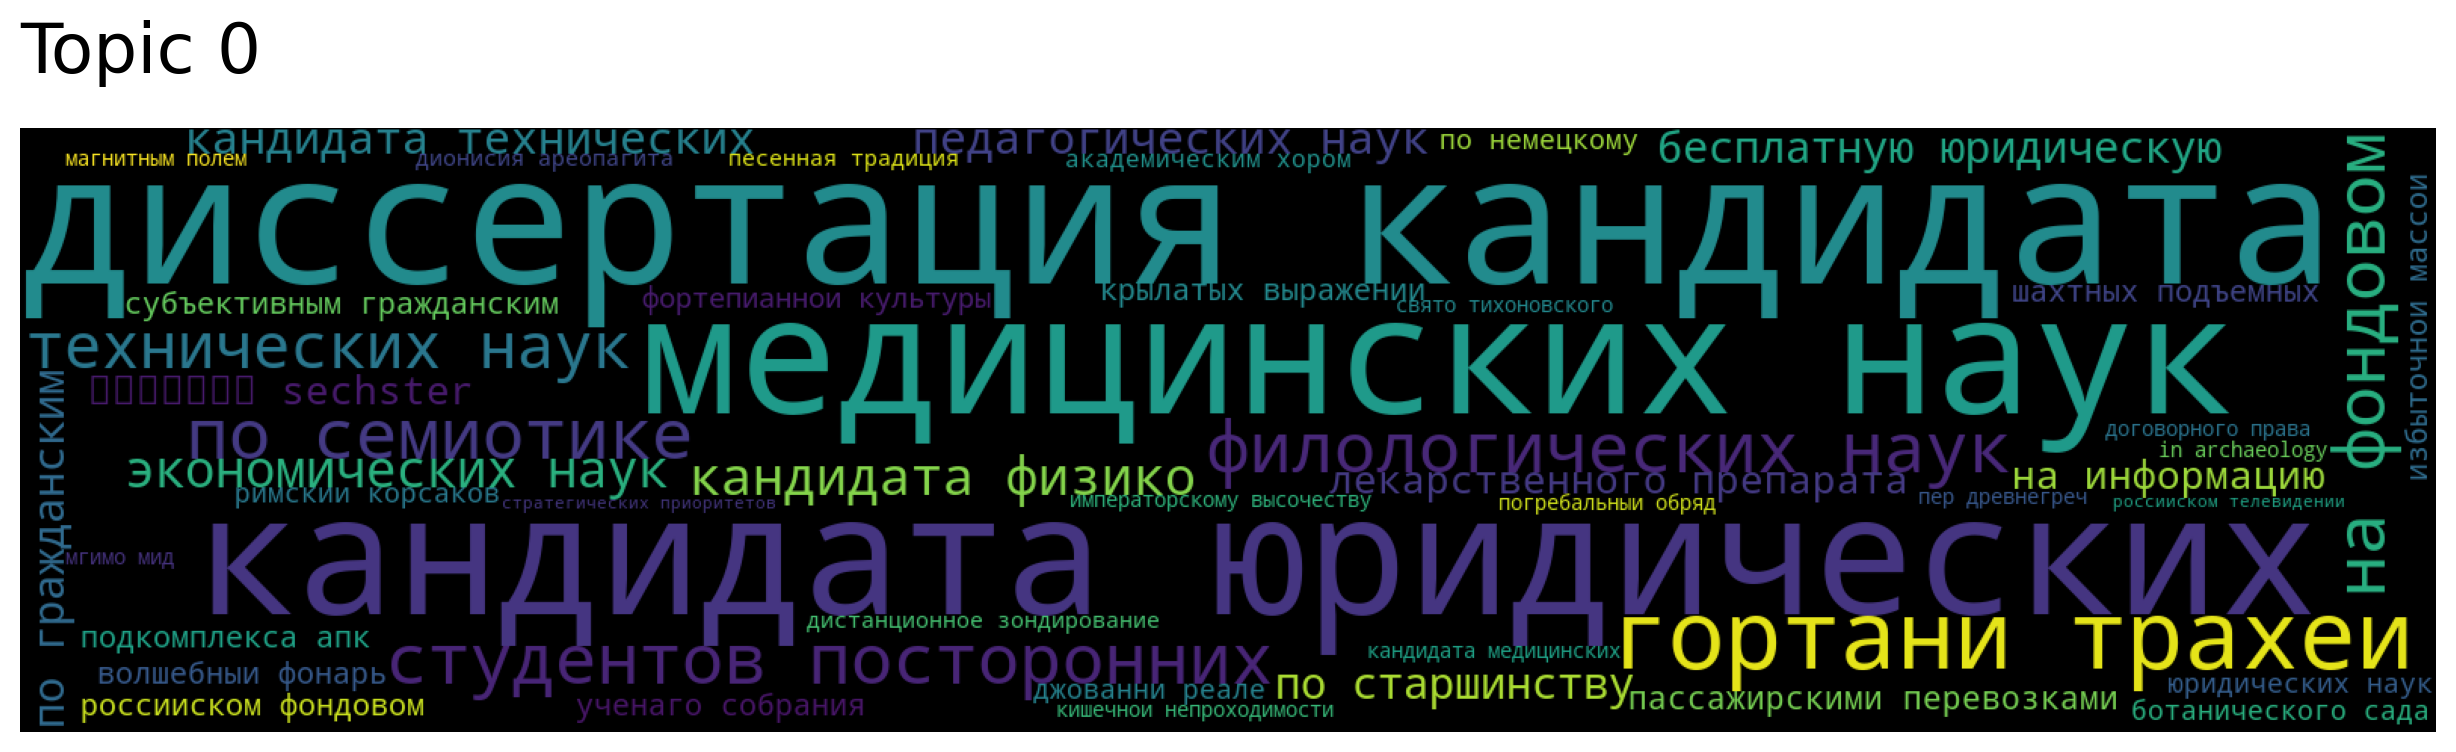

In [15]:
model.generate_topic_wordcloud(0, background_color='black', reduced=True)

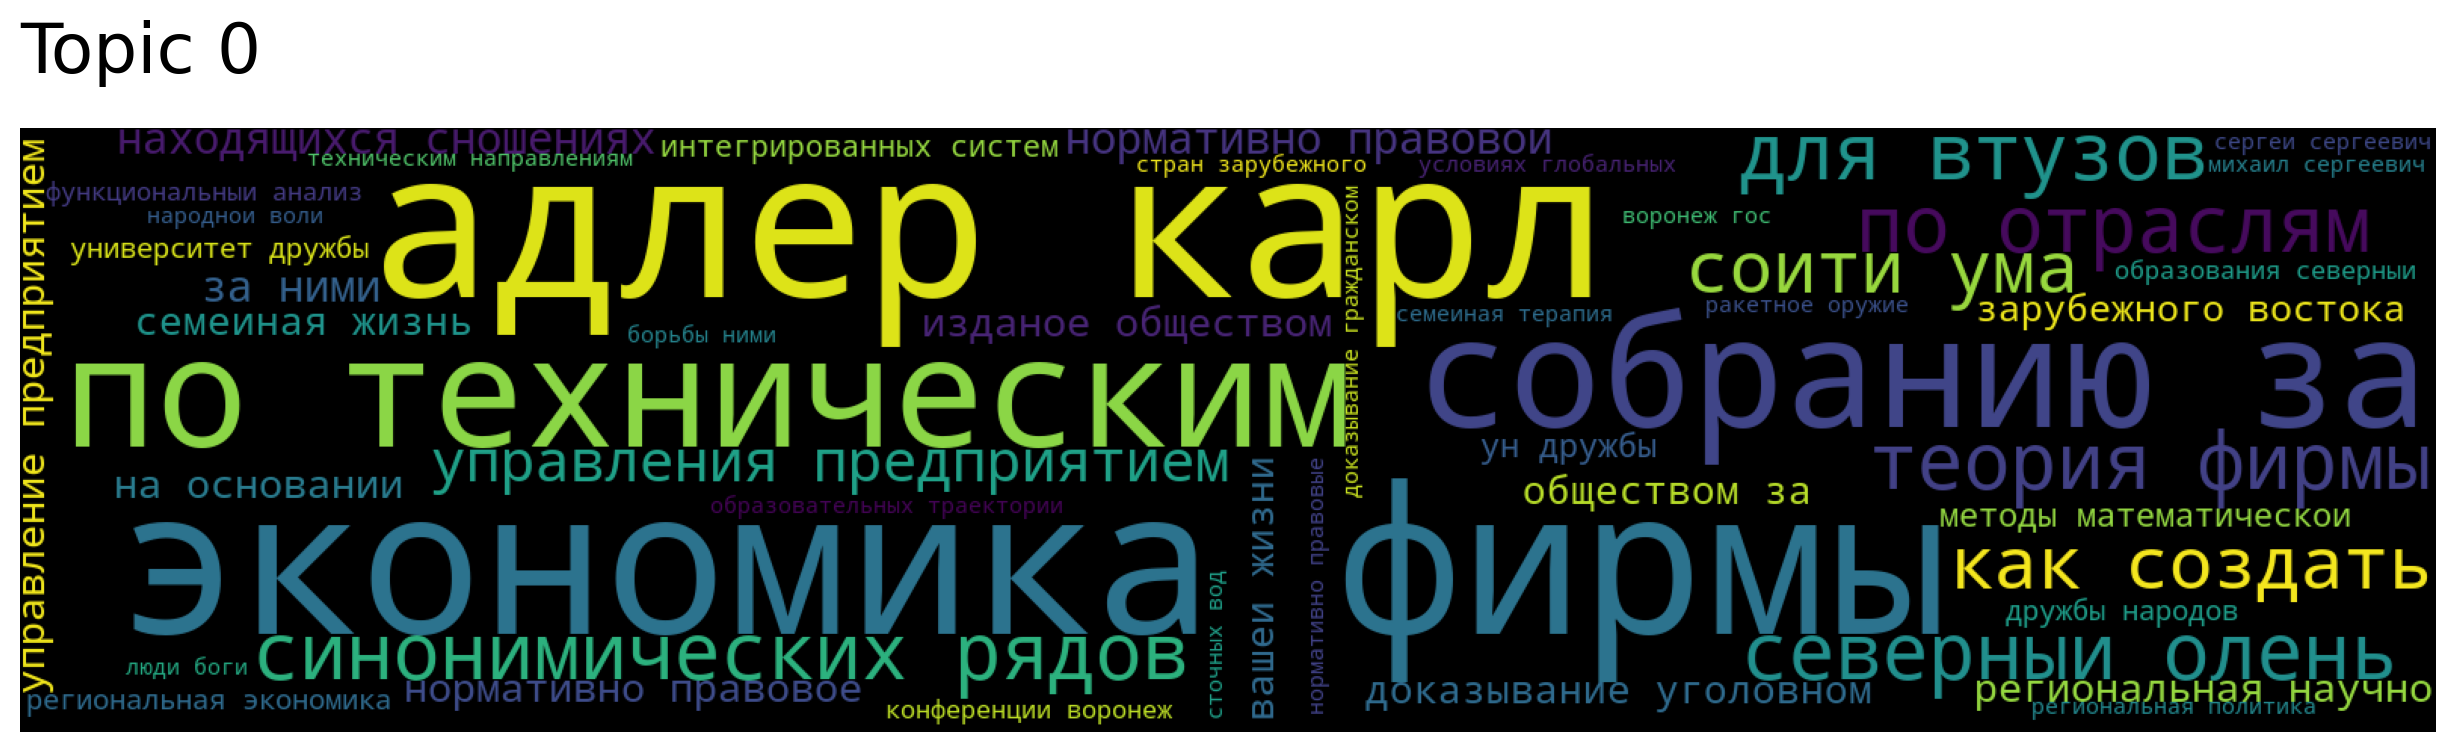

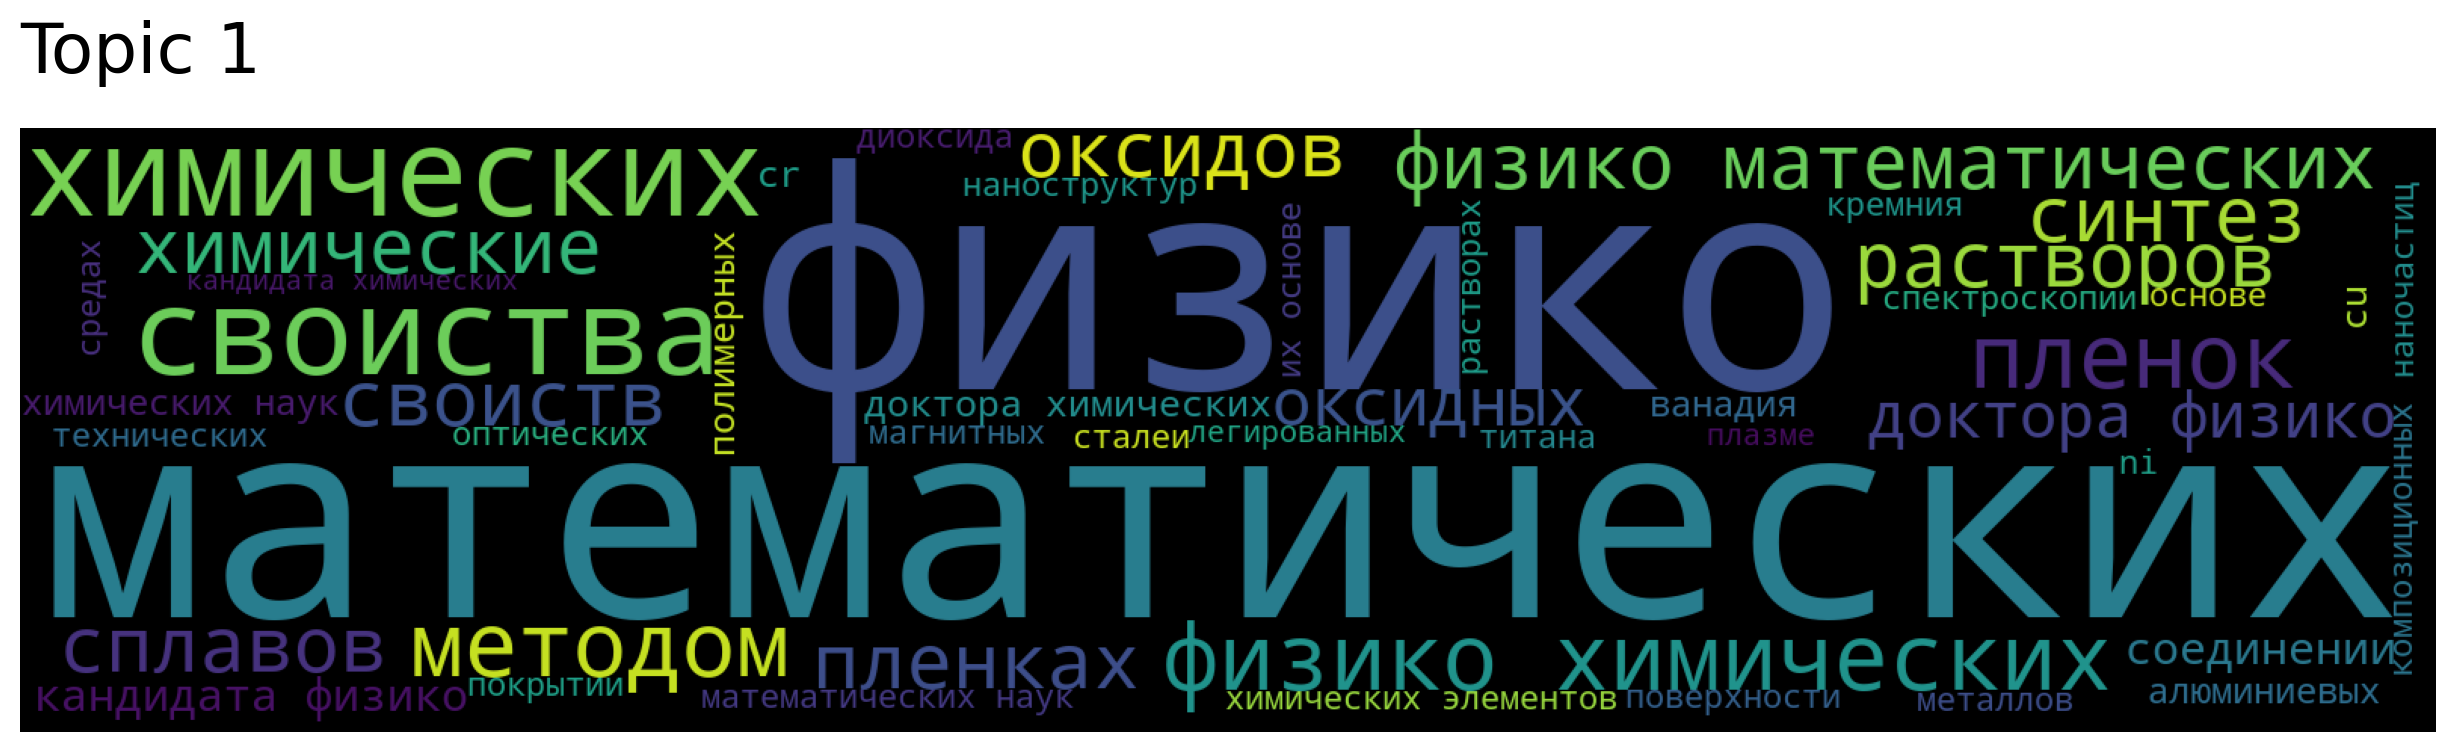

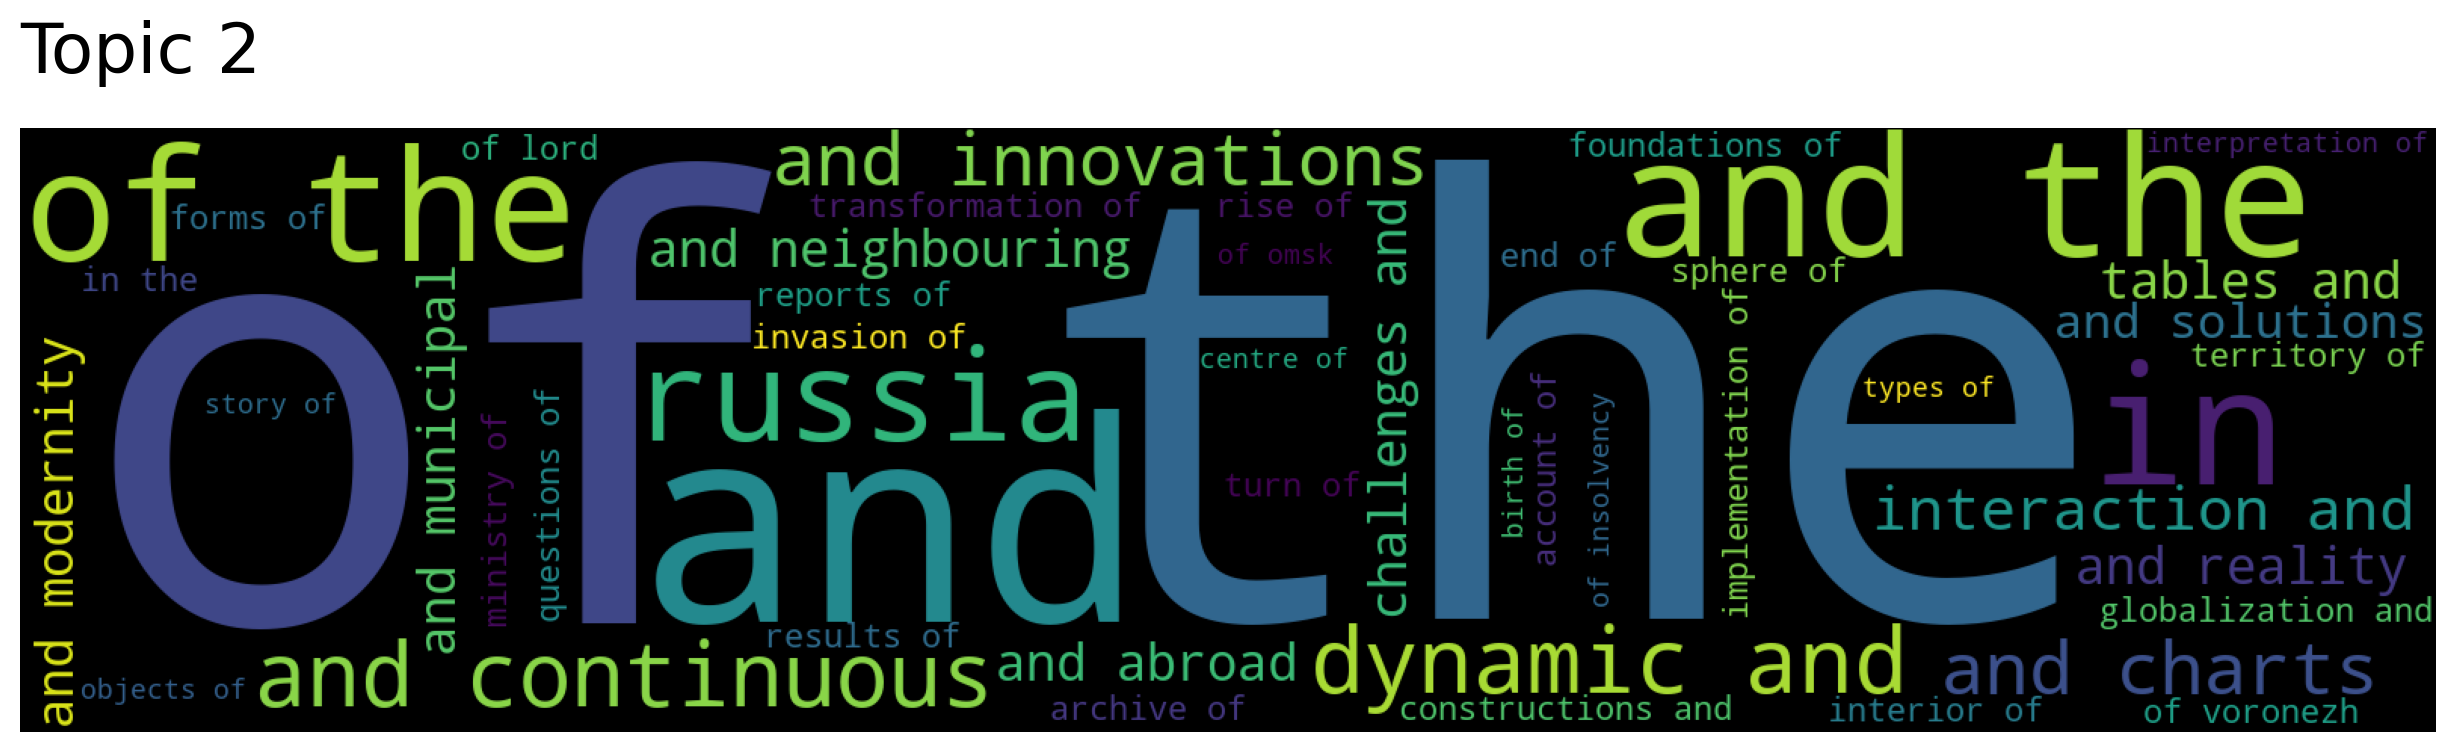

In [ ]:

nt= model.get_topics( reduced=False)
for topic in range(len(nt)):
    model.generate_topic_wordcloud(topic, background_color='black', reduced=False)

In [16]:
pip install -q umap-learn[plot]

In [18]:
import matplotlib.pyplot as plt
import pandas
import umap.plot
vectors = model.doc_top.reshape(-1, 1)
reduced_vectors = model.doc_top_reduced
reduced2d = umap.UMAP(n_neighbors=15, n_components=5, metric='cosine', verbose=True).fit_transform(vectors)
x, y = reduced2d[:,0], reduced2d[:,1]

plt.scatter(x,y)
#model = Top2Vec.load('model_name')
#umap.plot.points(umap_model, labels=model.doc_top)

UMAP(angular_rp_forest=True, metric='cosine', n_components=5, verbose=True)
Thu Sep  8 16:21:04 2022 Construct fuzzy simplicial set
Thu Sep  8 16:21:04 2022 Finding Nearest Neighbors
Thu Sep  8 16:21:04 2022 Building RP forest with 35 trees
Thu Sep  8 16:21:10 2022 NN descent for 18 iterations
	 1  /  18
	Stopping threshold met -- exiting after 1 iterations
Thu Sep  8 16:21:21 2022 Finished Nearest Neighbor Search
Thu Sep  8 16:21:27 2022 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

Thu Sep  8 16:42:23 2022 Finished embedding


ValueError: ignored

In [ ]:
x, y = reduced2d[:,0], reduced2d[:,1]
umap.plot.output_notebook()
p = umap.plot.interactive(reduced2d, labels=x, hover_data=y, point_size=2)
umap.plot.show(p)

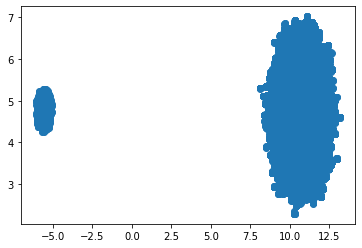

In [20]:
plt.scatter(x,y)

Text(0.5, 1.0, 'UMAP embedding of random colours')

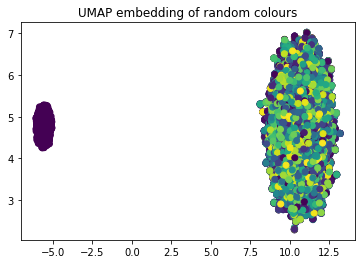

In [21]:
plt.scatter(x, y, c=vectors)
plt.title('UMAP embedding of random colours')

In [22]:
umap.plot.points(reduced2d)

ValueError: ignored

In [23]:
mapper = umap.UMAP().fit(train_data)

ValueError: ignored

In [ ]:
!pip install umap-learn[plot]
!pip install holoviews
!pip install -U ipykernel

In [26]:
umap.plot.points(reduced2d)

ValueError: ignored

In [19]:
reduced2d.save("/content/drive/MyDrive/teploteh_corpus/top2vec_books_doc2vec_umap.dump")

AttributeError: ignored

In [27]:
model.doc_top

array([ 526,  221,    0, ..., 1244, 1740,  817])

In [ ]:
#from requests import request
import pandas as pd
vecdf = pd.DataFrame(model.model.wv.vectors, index=model.model.wv.index_to_key)
print(vecdf.info())

<class 'pandas.core.frame.DataFrame'>
Index: 15961 entries, наук to любителя
Columns: 300 entries, 0 to 299
dtypes: float32(300)
memory usage: 18.4+ MB
None


In [ ]:
import pandas as pd
import umap
_umap = umap.UMAP(n_components=15, n_neighbors=5, min_dist=0.0, metric='cosine')
umapdf = pd.DataFrame(_umap.fit_transform(vecdf), index=vecdf.index)
print(umapdf.info())

<class 'pandas.core.frame.DataFrame'>
Index: 15961 entries, наук to любителя
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       15961 non-null  float32
 1   1       15961 non-null  float32
 2   2       15961 non-null  float32
 3   3       15961 non-null  float32
 4   4       15961 non-null  float32
 5   5       15961 non-null  float32
 6   6       15961 non-null  float32
 7   7       15961 non-null  float32
 8   8       15961 non-null  float32
 9   9       15961 non-null  float32
 10  10      15961 non-null  float32
 11  11      15961 non-null  float32
 12  12      15961 non-null  float32
 13  13      15961 non-null  float32
 14  14      15961 non-null  float32
dtypes: float32(15)
memory usage: 1.0+ MB
None


In [28]:
import hdbscan
_hdbscan = hdbscan.HDBSCAN(min_cluster_size=5)
clusters = _hdbscan.fit_predict(reduced2d)
unique_clusters = np.unique(clusters)

print('%d clusters...' % len(unique_clusters))
print('Clusters: %s...' % unique_clusters[:100])

21217 clusters...
Clusters: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46
 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70
 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94
 95 96 97 98]...


In [ ]:
from plotly import graph_objs
data = [dict(type='histogram', x=clusters)]
layout=dict(width=1000, height=300, margin=dict(l=0, t=0, r=0, b=0))
figure = graph_objs.Figure(data=data, layout=layout)
figure.show()

In [ ]:

from plotly.subplots import make_subplots
ALPHA = 0.5

figure = make_subplots(rows=1, cols=2)
for cluster in unique_clusters:
  plotdf = umapdf[clusters == cluster]
  figure.add_trace(dict(type='scattergl', mode='markers', x=plotdf[0], y=plotdf[1],
                        marker=dict(opacity=ALPHA), name='cluster#%d' % cluster, text=plotdf.index),
                   1, 1)
  if cluster != -1:
    figure.add_trace(dict(type='scattergl', mode='markers', x=plotdf[0], y=plotdf[1],
                          marker=dict(opacity=ALPHA), name='cluster#%d' % cluster, text=plotdf.index),
                     1, 2)
figure.update_layout(width=1000, height=400, showlegend=False, margin=dict(l=0, t=0, r=0, b=0))
figure.show()

ValueError: ignored

In [ ]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["RSL07000488000"], num_topics=5)
print (topic_nums)
print (topic_words)

In [ ]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=3, num_docs=10)

In [ ]:
documents, document_scores, document_ids = model.search_documents_by_keywords(keywords=["любовь"], num_docs=10)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: RSL01004277959, Score: 0.6149654984474182
-----------
Антропология техники : становление
-----------

Document: RSL01007251101, Score: 0.5940282344818115
-----------
Трудовые споры в СССР : Учеб. пособие по спецкурсу
-----------

Document: RSL01002558311, Score: 0.5894892811775208
-----------
Политический режим и модернизация Китая : монография
-----------

Document: RSL01001646527, Score: 0.5883470177650452
-----------
Почти 200 задач по генетике
-----------

Document: RSL01007536399, Score: 0.5859140753746033
-----------
Советский стажер в Китае : дневниковые записи о стажировке в университете Фудань (Шанхай) в 1985-1986 гг.
-----------

Document: RSL01006713860, Score: 0.5841763019561768
-----------
Темные аллеи : рассказы
-----------

Document: RSL01001349959, Score: 0.5813676118850708
-----------
Устав Общества психологов СССР : Принят VI съездом О-ва психологов 22.08.83 и утв. Президиумом АН СССР 21.06.84
-----------

Document: RSL01003971595, Score: 0.5784139037132263


In [ ]:
pip install -q ipywidgets

In [ ]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


In [ ]:
import ipywidgets as widgets

In [ ]:
keywords_select_st = widgets.Label('Enter keywords seperated by space: ')
display(keywords_select_st)

keywords_input_st = widgets.Text()
display(keywords_input_st)

keywords_neg_select_st = widgets.Label('Enter negative keywords seperated by space: ')
display(keywords_neg_select_st)

keywords_neg_input_st = widgets.Text()
display(keywords_neg_input_st)

doc_num_select_st = widgets.Label('Choose number of topics: ')
display(doc_num_select_st)

doc_num_input_st = widgets.Text(value='5')
display(doc_num_input_st)

def display_similar_topics(*args):
    
    clear_output()
    display(keywords_select_st)
    display(keywords_input_st)
    display(keywords_neg_select_st)
    display(keywords_neg_input_st)
    display(doc_num_select_st)
    display(doc_num_input_st)
    display(keyword_btn_st)
    
    try:
        topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=keywords_input_st.value.split(),num_topics=int(doc_num_input_st.value), keywords_neg=keywords_neg_input_st.value.split())
        for topic in topic_nums:
            model.generate_topic_wordcloud(topic, background_color="black")
        
    except Exception as e:
        print(e)
        
keyword_btn_st = widgets.Button(description="show topics")
display(keyword_btn_st)
keyword_btn_st.on_click(display_similar_topics)

In [ ]:
topic_num_select = widgets.Label('Select topic number: ')
display(topic_num_select)

topic_input = widgets.Text()
display(topic_input)

doc_num_select = widgets.Label('Choose number of documents: ')
display(doc_num_select)

doc_num_input = widgets.Text(value='10')
display(doc_num_input)

def display_topics(*args):
    
    clear_output()
    display(topic_num_select)
    display(topic_input)
    display(doc_num_select)
    display(doc_num_input)
    display(topic_btn)

    documents, document_scores, document_nums = model.search_documents_by_topic(topic_num=int(topic_input.value), num_docs=int(doc_num_input.value))
    
    result_df = DataFrame.loc[document_nums]
    result_df["document_scores"] = document_scores
    
    for index,row in result_df.iterrows():
        print(f"Document: {index}, Score: {row.document_scores}")
        print(f"Section: {row.section}")
        print(f"Title: {row.title}")
        print("-----------")
        print(row.text)
        print("-----------")
        print()

topic_btn = widgets.Button(description="show documents")
display(topic_btn)
topic_btn.on_click(display_topics)

In [ ]:
documents, document_scores, document_ids = model.search_documents_by_keywords(keywords=["лечение"], num_docs=5, reduced=True)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

TypeError: ignored

In [ ]:
words, word_scores = model.similar_words(keywords=["космос"], keywords_neg=[], num_words=20)
for word, score in zip(words, word_scores):
    print(f"{word} {score}")

гагарина 0.4120630357200634
полета 0.3860354457082875
летию полета 0.3586815346908081
незнаика солнечном 0.3364785031724008
незнаика 0.3354824947057087
космического полета 0.3270391260470377
полеты 0.3241446103046539
смыслом 0.31284851690167303
из космоса 0.31269743794559424
динамика полета 0.3090508037388292
планеты земля 0.3089914245429427
на луне 0.307173599863678
человек природа 0.30439194816692844
человек земля 0.3040419195344836
ракеты люди 0.30071886429567624
природа человек 0.2998903908424181
земля вселенная 0.2985361201758189
космических полетов 0.29766140559070325
для старш 0.2972066983962093
баллистические ракеты 0.2928256848072515


In [ ]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=48, num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: RSL01004403469, Score: 0.9533189535140991
-----------
Быть христианином.. : беседы
-----------

Document: RSL01001753078, Score: 0.9475050568580627
-----------
Малая медицинская энциклопедия : в 6 т. / гл. ред. В. И. Покровский : Токсины - Ящур
-----------

Document: RSL01010088655, Score: 0.9424917697906494
-----------
Пьесы : 18+ / Иван Вырыпаев : Т. 2
-----------

Document: RSL01009545855, Score: 0.9410154819488525
-----------
Мой ангел : как говорить со своим хранителем и получать помощь с небес
-----------

Document: RSL01004499973, Score: 0.9409388303756714
-----------
Святая проститутка: архетип вечной женственности
-----------



In [ ]:
maped_df = pd.DataFrame()
agg_func_unique= {'sys_numb': ['unique']}
maped_df["maped_id"] = train_data.groupby(["chb"]).agg(agg_func_unique)
maped_df.head(10)